In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set up visualization style
sns.set(style="whitegrid")
plt.style.use("ggplot")

In [ ]:
# Load the dataset
train_data = pd.read_csv("../data/train_cleaned.csv")

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(train_data.head())

First 5 rows of the dataset:


,id,title,content,target,content_length
0,11098,Getting of the weed,"[Post removed at request of member]\nHi, welco...",suicidal-thoughts-and-self-harm,692
1,116,Seeking advice on how to face a hospital stay,"Hi NMTB,\nThanks for your post. \nI think a lo...",anxiety,692
2,7189,Trying to re-enter the work place,"Hello, \nI’m Cas and for a fair while now I ha...",anxiety,692
3,4350,Family history of cancer,Hey everyone.\nI've just discovered that anoth...,anxiety,692
4,9749,Inappropriate relationship with therapist.,Hi everyone\nI guess the title says it all rea...,depression,692


In [ ]:
# Basic information about the dataset
print("\nDataset Information:")
train_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21909 entries, 0 to 21908
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              21909 non-null  int64 
 1   title           21909 non-null  object
 2   content         21909 non-null  object
 3   target          21909 non-null  object
 4   content_length  21909 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 855.9+ KB


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
id                0
title             0
content           0
target            0
content_length    0
dtype: int64


In [ ]:
# Summary statistics for numerical columns (if any)
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
                 id  content_length
count  21909.000000         21909.0
mean   12278.192706           692.0
std     7103.330174             0.0
min        0.000000           692.0
25%     6130.000000           692.0
50%    12265.000000           692.0
75%    18420.000000           692.0
max    24612.000000           692.0


In [33]:
# Distribution of target classes
print("\nDistribution of Target Classes:")
target_counts = train_data["target"].value_counts()
print(target_counts)


Distribution of Target Classes:
target
relationship-and-family-issues     6616
anxiety                            6590
depression                         5768
ptsd-and-trauma                    1800
suicidal-thoughts-and-self-harm    1135
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_38412\3453920590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


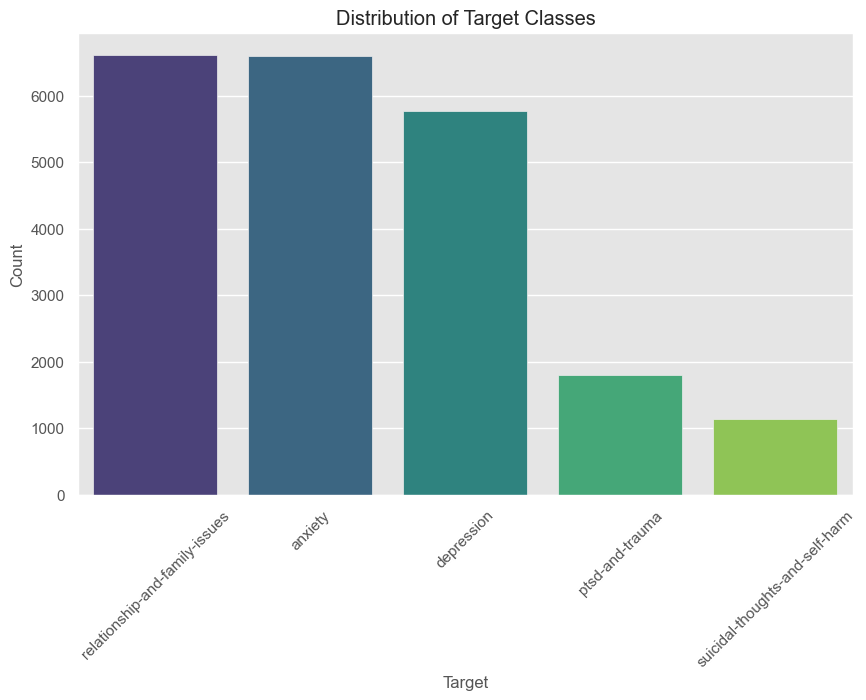

In [34]:
# Plot the distribution of target classes
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title("Distribution of Target Classes")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Vérifier les valeurs manquantes dans la colonne 'content'
missing_values = train_data["content"].isnull().sum()
print(f"Nombre de valeurs manquantes dans 'content': {missing_values}")

Nombre de valeurs manquantes dans 'content': 242


In [ ]:
# Supprimer les lignes où la colonne 'content' a des valeurs manquantes
# train_data_cleaned = train_data.dropna(subset=["content"])

In [27]:
# Sauvegarder le fichier nettoyé dans un nouveau fichier CSV (ou écraser l'ancien)
train_data_cleaned.to_csv("../data/train_cleaned.csv", index=False)

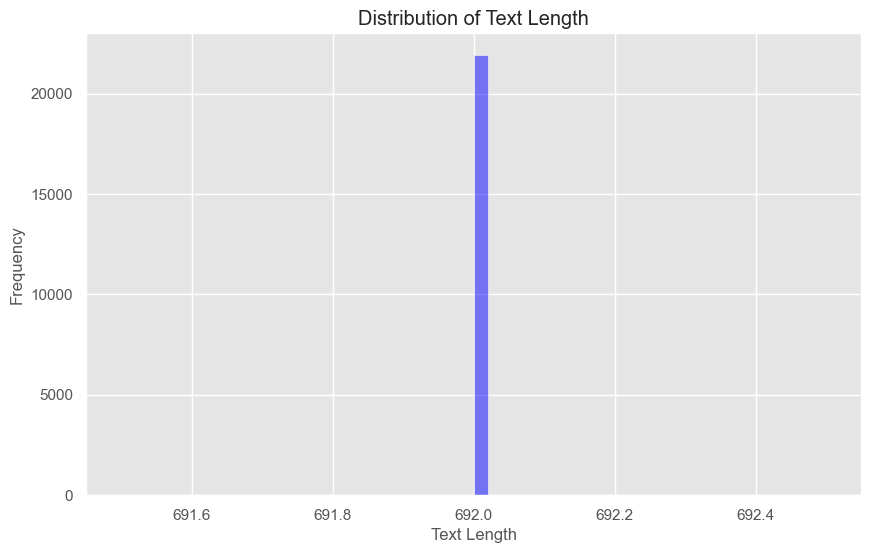

In [35]:
# Plot distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(train_data["content_length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [36]:
# Analyze word count
train_data["word_count"] = train_data["content"].apply(lambda x: len(x.split()))

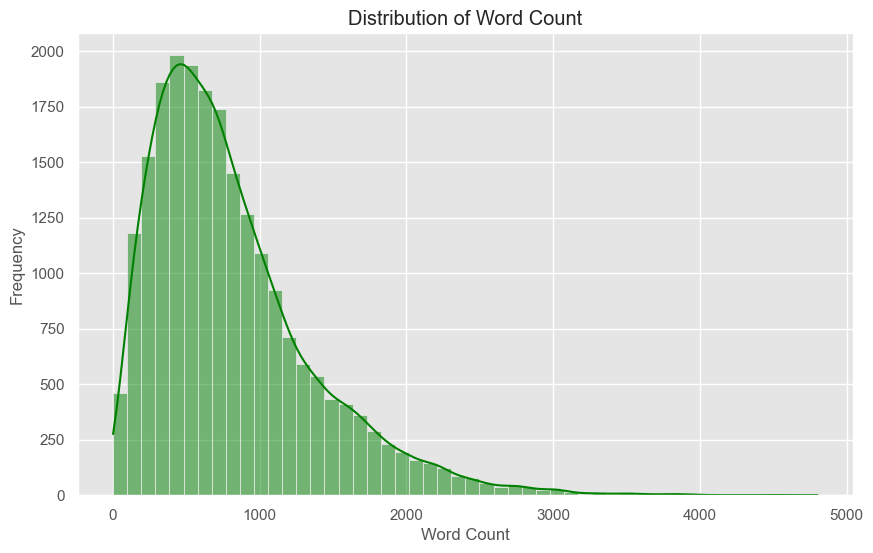

In [37]:
# Plot distribution of word count
plt.figure(figsize=(10, 6))
sns.histplot(train_data["word_count"], bins=50, kde=True, color="green")
plt.title("Distribution of Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_38412\4082061996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="content_length", data=train_data, palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_38412\4082061996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="word_count", data=train_data, palette="Set2")


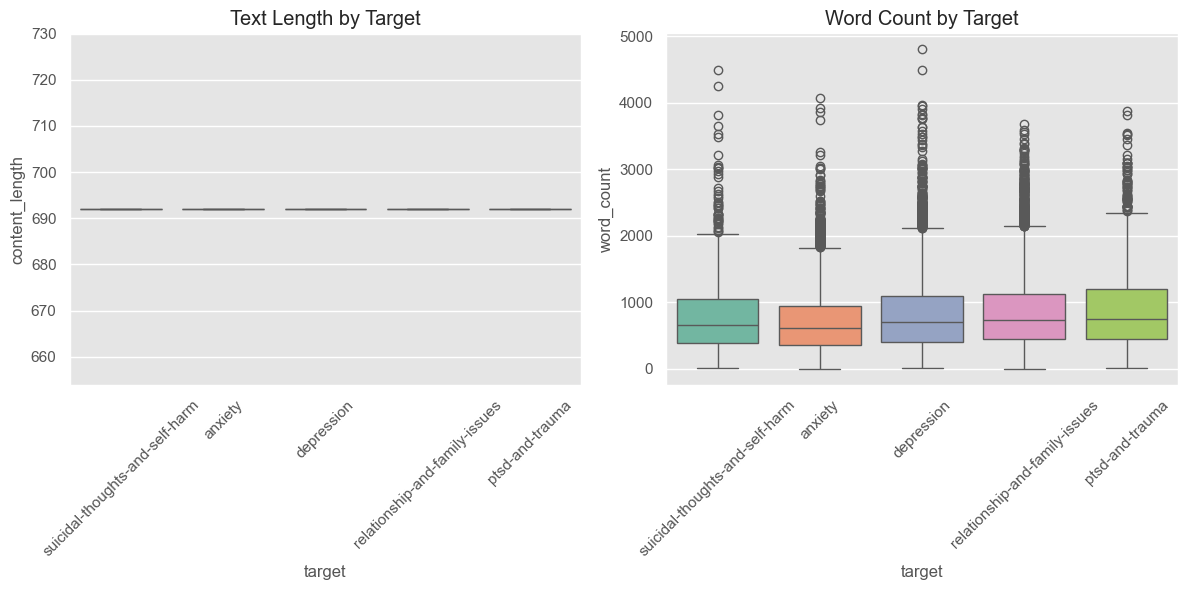

In [38]:
# Correlation between text length/word count and target
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="content_length", data=train_data, palette="Set2")
plt.title("Text Length by Target")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="word_count", data=train_data, palette="Set2")
plt.title("Word Count by Target")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# Most common words in each target category
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
# Top 10 words for each target category
target_categories = train_data["target"].unique()

for category in target_categories:
    print(f"\nTop 10 words for '{category}':")
    corpus = train_data[train_data["target"] == category]["content"]
    top_words = get_top_n_words(corpus, n=10)
    for word, freq in top_words:
        print(f"{word}: {freq}")


Top 10 words for 'suicidal-thoughts-and-self-harm':
to: 35196
and: 26310
you: 25993
the: 23180
it: 15035
of: 14527
that: 13869
in: 10792
is: 10341
my: 9995

Top 10 words for 'anxiety':
to: 166432
and: 139672
the: 121734
you: 118240
it: 85470
of: 67585
that: 64546
my: 60231
is: 56011
have: 53166

Top 10 words for 'depression':
to: 175128
and: 142400
you: 128555
the: 120744
it: 81579
of: 71847
that: 68925
is: 57428
my: 54512
have: 53551

Top 10 words for 'relationship-and-family-issues':
to: 207477
and: 176167
you: 144901
the: 139235
it: 90607
that: 80960
of: 77121
is: 76741
for: 62868
in: 62852

Top 10 words for 'ptsd-and-trauma':
to: 59111
and: 49493
you: 43524
the: 41920
it: 26927
of: 24300
that: 23722
my: 20435
is: 19466
in: 18794



Word Cloud for 'suicidal-thoughts-and-self-harm':


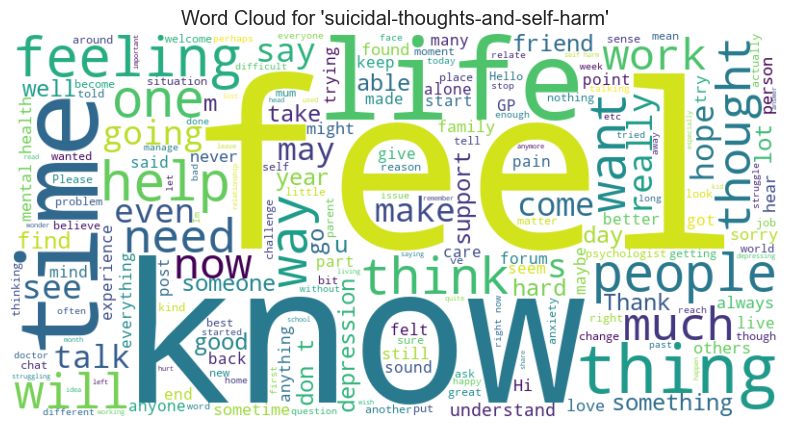


Word Cloud for 'anxiety':


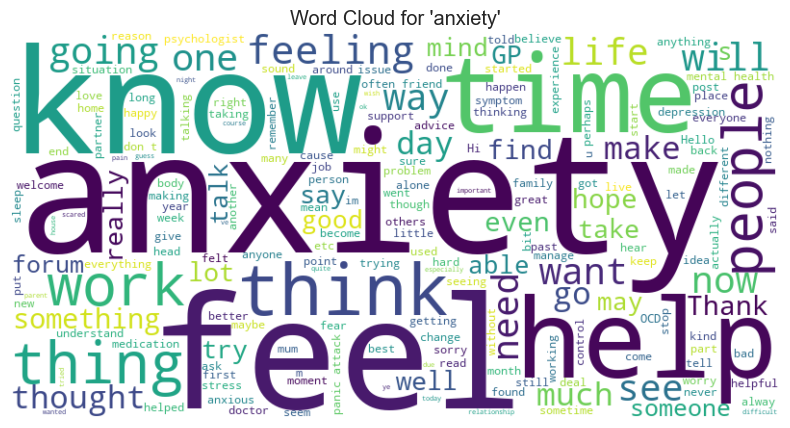


Word Cloud for 'depression':


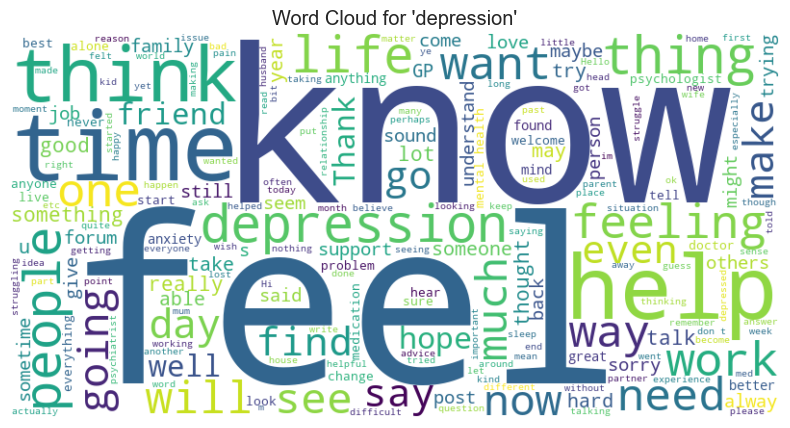


Word Cloud for 'relationship-and-family-issues':


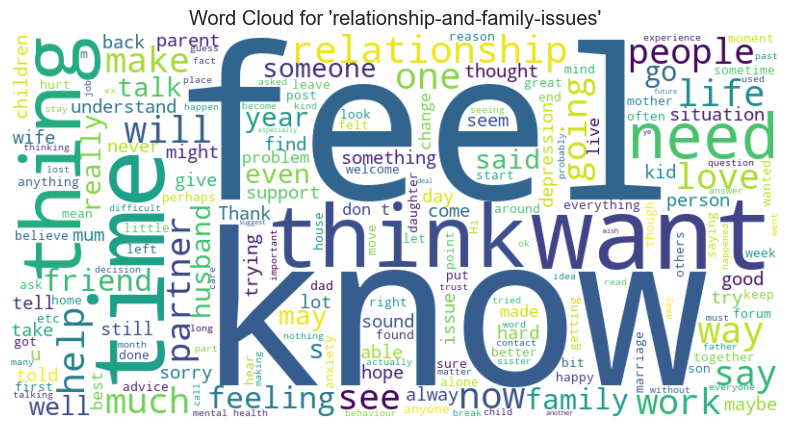


Word Cloud for 'ptsd-and-trauma':


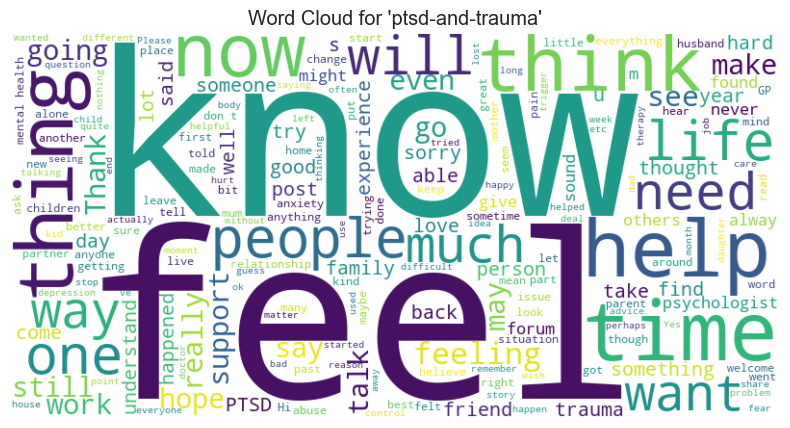

In [40]:
# Word cloud for each target category
from wordcloud import WordCloud

for category in target_categories:
    print(f"\nWord Cloud for '{category}':")
    corpus = " ".join(train_data[train_data["target"] == category]["content"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(corpus)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for '{category}'")
    plt.show()